## SCRAPING SITO DEL CENTRO RICERCA CRS4

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://www.crs4.it/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
CRS4 | center for advanced studies, research and development in sardinia


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
lista_url

['https://www.crs4.it/privacy-policy/',
 'https://www.crs4.it/services/high-performance-computing/',
 'https://www.crs4.it/research/energy-and-environment/',
 'https://www.crs4.it/research/biosciences/',
 'https://www.crs4.it/it/trasparente/',
 'https://www.crs4.it/results/awards/',
 'https://www.crs4.it/news-view/crs4-participates-in-the-event-nuragic-monuments-as-cultural-heritage-of-humanity/',
 'https://www.crs4.it/results/publications/',
 'https://www.crs4.it/events/research-focus/',
 'http://next.crs4.it',
 'https://www.crs4.it/30years/',
 'https://www.crs4.it/press-release/',
 'http://www.slideshare.net/CRS4',
 'http://www.linkedin.com/company/crs4',
 'https://www.crs4.it/research/digital-technologies-for-aerospace/',
 'https://www.crs4.it/about/organization-chart/',
 '#top',
 'https://www.crs4.it/30years/patronage/',
 'https://www.crs4.it/news-view/intense-project-online-event-the-crs4-contribution-to-sustainable-tourism/',
 'http://twitter.com/crs4research',
 'https://www.crs4

In [4]:
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
        
lista_url2 = list(filter(lambda x: x.startswith('https://www.crs4.it'), res))
lista_url2=list(set(lista_url2))
lista_url2

['https://www.crs4.it/privacy-policy/',
 'https://www.crs4.it/services/high-performance-computing/',
 'https://www.crs4.it/research/energy-and-environment/',
 'https://www.crs4.it/research/biosciences/',
 'https://www.crs4.it/it/trasparente/',
 'https://www.crs4.it/results/awards/',
 'https://www.crs4.it/news-view/crs4-participates-in-the-event-nuragic-monuments-as-cultural-heritage-of-humanity/',
 'https://www.crs4.it/results/publications/',
 'https://www.crs4.it/events/research-focus/',
 'https://www.crs4.it/30years/',
 'https://www.crs4.it/press-release/',
 'https://www.crs4.it/research/digital-technologies-for-aerospace/',
 'https://www.crs4.it/about/organization-chart/',
 'https://www.crs4.it/30years/patronage/',
 'https://www.crs4.it/news-view/intense-project-online-event-the-crs4-contribution-to-sustainable-tourism/',
 'https://www.crs4.it/about/',
 'https://www.crs4.it/30years/ourhistory/',
 'https://www.crs4.it/research/',
 'https://www.crs4.it/results/open-source-software/',


In [7]:
lista_url3=[x for x in lista_url2 if 'https://www.crs4.it/research/' in x]
lista_url3

['https://www.crs4.it/research/energy-and-environment/',
 'https://www.crs4.it/research/biosciences/',
 'https://www.crs4.it/research/digital-technologies-for-aerospace/',
 'https://www.crs4.it/research/',
 'https://www.crs4.it/research/computational-infrastructure-and-smart-projects/',
 'https://www.crs4.it/research/information-society/',
 'https://www.crs4.it/research/visual-and-data-intensive-computing/']

In [9]:
texts = []
title= []
for url in lista_url3[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"row"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['HPC for Energy and Environment  |  CRS4',
 'Biosciences  |  CRS4',
 'Digital Technologies for Aerospace  |  CRS4',
 'Research  |  CRS4',
 'Computational Infrastructure and Smart Projects  |  CRS4',
 'ICT – Information Society  |  CRS4',
 'Visual and Data-Intensive Computing  |  CRS4']

In [10]:
print(texts[1])







                                
								 English 
 Italiano (Italian)


 






center for advanced studies, research and development in sardinia

 
















Home
OUR FIRST 30 YEARS

PRESS CONFERENCE
HOW CRS4 STARTED
30 YEARS OF ACHIEVEMENTS
30 YEARS ON THE MEDIA
TALKING ABOUT US
PATRONAGE
SPONSORS
LEGAL REPRESENTATIVES
SUPPORT US


Research

Biosciences
Computational Infrastructure and Smart Projects
Digital Technologies for Aerospace
HPC for Energy and Environment
ICT - Information Society
Visual and Data-Intensive Computing


DEVELOPMENT AND SERVICES

Next Generation Sequencing Core Facility
High Performance Computing services
Technology Catalogue
Open Source Software - OSS


Projects

Scientific schools
Projects


Customers and Partnerships

Customers
Partnerships


Results

Publications
Patents and trademarks
Awards


PRESS AND MEDIA

Press Kit
Research focus
Press Office
News
Press Release
Press Review
Video Gallery CRS4
Video Visual Computing
Events


About us

Org

### TEXT CLEANING

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

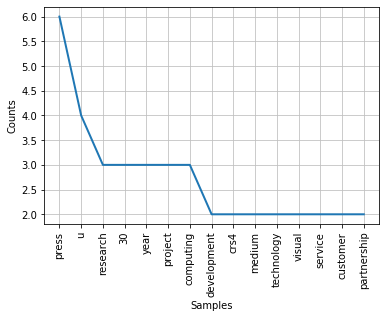

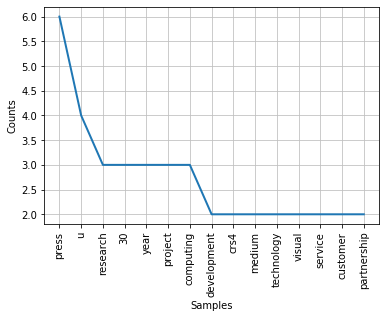

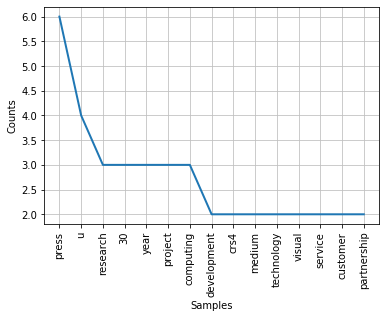

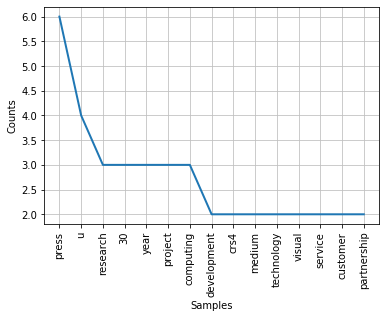

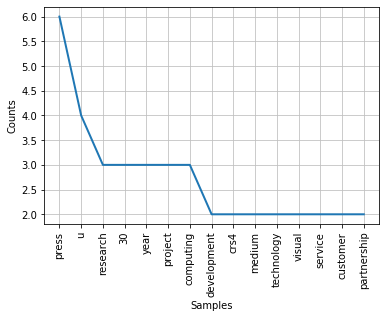

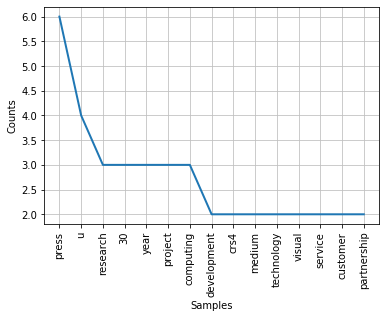

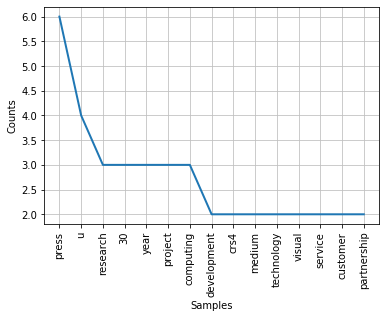

In [13]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [ ]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

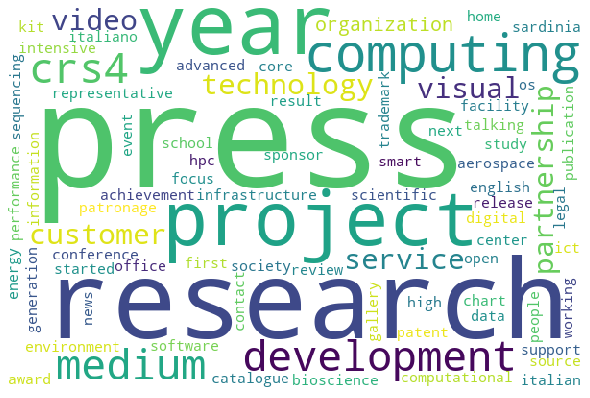

In [14]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[3]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

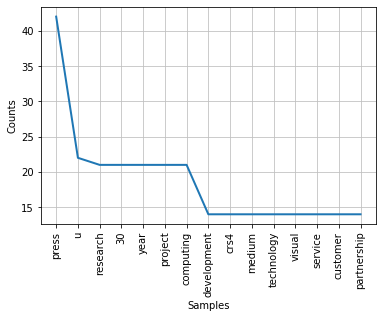

In [15]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

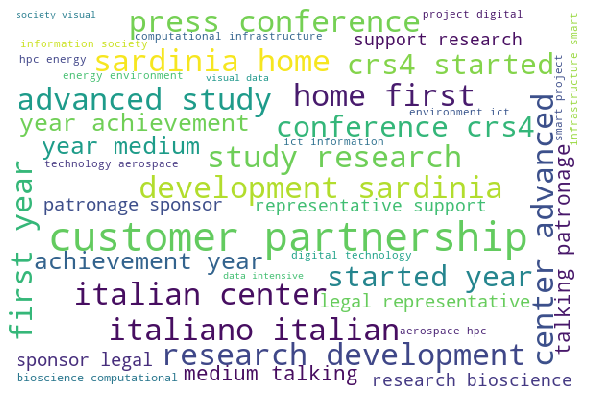

In [16]:
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## mutual information fra parola e centro di ricerca

In [17]:
from nltk import bigrams
import collections
import math
from math import log

#formula: PMI-IR (w1, w2) = log2 p(w1&w2)/p(w1)*p(w2); p=probability, w=word 

In [18]:
a1=tot_text.split()    
a2=collections.Counter(a1)
#a2= a2.most_common(15) 
a3=collections.Counter(bigrams(a2))
a4=sum([a2[x]for x in a2])
a5=sum([a3[x]for x in a3])
a6={x:float(a2[x])/a4 for x in a2} # word probabilities(w1 and w2)
a7={x:float(a3[x])/a5 for x in a3} # joint probabilites (w1&w2)
u = []
for x in a6:
    k={x:round(log(a7[b]/(a6[x] * a6[y]),2),4) for b in a7 for y in a6 if x and y in b}
    u.append(k)
    
u

[{'english': 10.1946},
 {'italiano': 7.3872},
 {'italian': 7.3872},
 {'center': 7.3872},
 {'advanced': 7.3872},
 {'study': 7.3872},
 {'research': 5.8023},
 {'development': 6.3872},
 {'sardinia': 7.3872},
 {'home': 7.3872},
 {'first': 7.3872},
 {'30': 5.8023},
 {'year': 5.8023},
 {'press': 4.8023},
 {'conference': 7.3872},
 {'crs4': 6.3872},
 {'started': 7.3872},
 {'achievement': 7.3872},
 {'medium': 6.3872},
 {'talking': 7.3872},
 {'u': 5.7352},
 {'patronage': 7.3872},
 {'sponsor': 7.3872},
 {'legal': 7.3872},
 {'representative': 7.3872},
 {'support': 7.3872},
 {'bioscience': 7.3872},
 {'computational': 7.3872},
 {'infrastructure': 7.3872},
 {'smart': 7.3872},
 {'project': 5.8023},
 {'digital': 7.3872},
 {'technology': 6.3872},
 {'aerospace': 7.3872},
 {'hpc': 7.3872},
 {'energy': 7.3872},
 {'environment': 7.3872},
 {'ict': 7.3872},
 {'information': 7.3872},
 {'society': 7.3872},
 {'visual': 6.3872},
 {'data': 7.3872},
 {'intensive': 7.3872},
 {'computing': 5.8023},
 {'service': 6.3872

In [19]:
values = [list(d.values())[0] for d in u]
values.sort()

Lista2 = []
for x in values:
    for d in u:
        val = list(d.values())[0]

        if x == val:
            Lista2.append({list(d.keys())[0]: x})
Lista2

[{'press': 4.8023},
 {'u': 5.7352},
 {'research': 5.8023},
 {'30': 5.8023},
 {'year': 5.8023},
 {'project': 5.8023},
 {'computing': 5.8023},
 {'research': 5.8023},
 {'30': 5.8023},
 {'year': 5.8023},
 {'project': 5.8023},
 {'computing': 5.8023},
 {'research': 5.8023},
 {'30': 5.8023},
 {'year': 5.8023},
 {'project': 5.8023},
 {'computing': 5.8023},
 {'research': 5.8023},
 {'30': 5.8023},
 {'year': 5.8023},
 {'project': 5.8023},
 {'computing': 5.8023},
 {'research': 5.8023},
 {'30': 5.8023},
 {'year': 5.8023},
 {'project': 5.8023},
 {'computing': 5.8023},
 {'development': 6.3872},
 {'crs4': 6.3872},
 {'medium': 6.3872},
 {'technology': 6.3872},
 {'visual': 6.3872},
 {'service': 6.3872},
 {'customer': 6.3872},
 {'partnership': 6.3872},
 {'video': 6.3872},
 {'organization': 6.3872},
 {'development': 6.3872},
 {'crs4': 6.3872},
 {'medium': 6.3872},
 {'technology': 6.3872},
 {'visual': 6.3872},
 {'service': 6.3872},
 {'customer': 6.3872},
 {'partnership': 6.3872},
 {'video': 6.3872},
 {'org